In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [4]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#轉換BGR->RGB

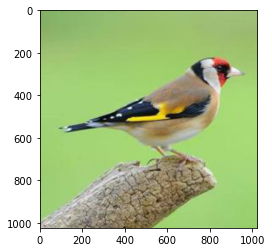

In [25]:
plt.imshow(img)

## 1-1. cluster with only RGB values

In [12]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [15]:
h, w, c =img.shape
print(img.shape)

Z=img.reshape(-1,3)
print(Z.shape)
print(Z)
print('--------')

#original
K=2
label, center = km_clust(Z,K)

#NOW convert back into uint8 and make original image
center = np.uint8(center[:,:3])
center

(1024, 1024, 3)
(1048576, 3)
[[129 175 100]
 [129 175 100]
 [129 175 100]
 ...
 [153 207 109]
 [153 207 109]
 [153 207 109]]
--------
[[107.68180177  95.55200125  71.59172666]
 [163.22523269 197.72077299 120.58292219]]


array([[107,  95,  71],
       [163, 197, 120]], dtype=uint8)

In [17]:
label.shape

(1048576,)

In [20]:
res = center[label.flatten()]
res

array([[163, 197, 120],
       [163, 197, 120],
       [163, 197, 120],
       ...,
       [163, 197, 120],
       [163, 197, 120],
       [163, 197, 120]], dtype=uint8)

In [23]:
res = res.reshape(img.shape)
res

array([[[163, 197, 120],
        [163, 197, 120],
        [163, 197, 120],
        ...,
        [163, 197, 120],
        [163, 197, 120],
        [163, 197, 120]],

       [[163, 197, 120],
        [163, 197, 120],
        [163, 197, 120],
        ...,
        [163, 197, 120],
        [163, 197, 120],
        [163, 197, 120]],

       [[163, 197, 120],
        [163, 197, 120],
        [163, 197, 120],
        ...,
        [163, 197, 120],
        [163, 197, 120],
        [163, 197, 120]],

       ...,

       [[163, 197, 120],
        [163, 197, 120],
        [163, 197, 120],
        ...,
        [163, 197, 120],
        [163, 197, 120],
        [163, 197, 120]],

       [[163, 197, 120],
        [163, 197, 120],
        [163, 197, 120],
        ...,
        [163, 197, 120],
        [163, 197, 120],
        [163, 197, 120]],

       [[163, 197, 120],
        [163, 197, 120],
        [163, 197, 120],
        ...,
        [163, 197, 120],
        [163, 197, 120],
        [163, 197, 120]]

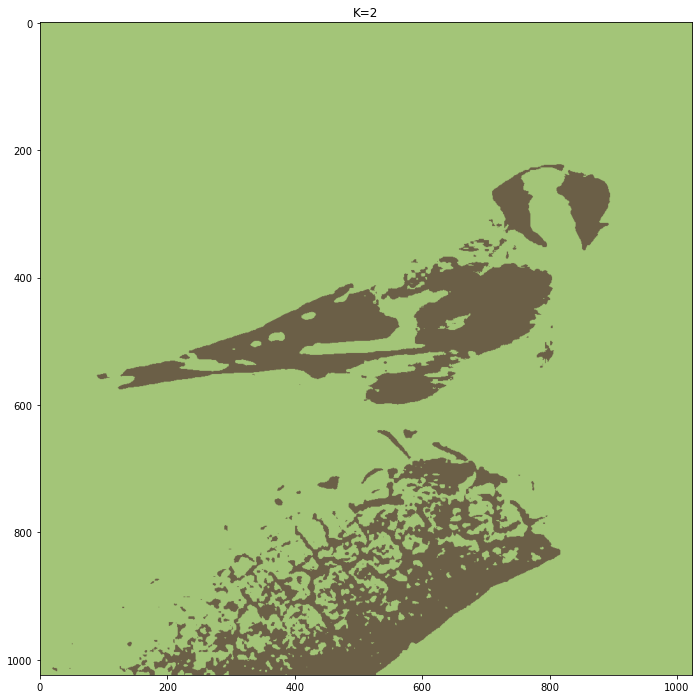

In [24]:
plt.figure(figsize=(16,12))
plt.title("K={}".format(K))
plt.imshow(res)

(1024, 1024, 3)
[[163.22894167 197.7378391  120.58754226]
 [107.75234566  95.61897607  71.64568262]]
[[160.6541085  204.76190999 114.71382025]
 [ 58.36348947  55.18801111  46.13890476]
 [183.96725866 182.76173634 164.93637579]
 [143.93704412 128.30104937  97.20818163]]


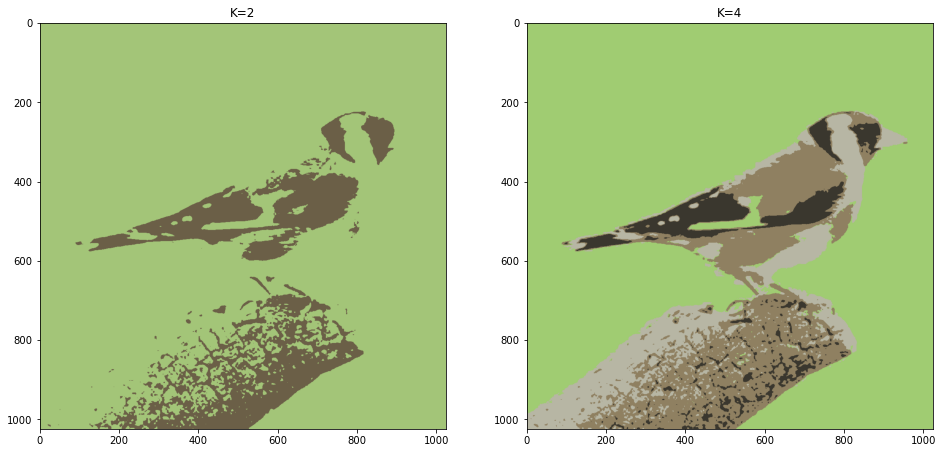

In [27]:
h, w, c =img.shape
print(img.shape)

Z=img.reshape(-1,3)
Ka = [2,4]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ka):
    label, center = km_clust(Z,K)
    #NOW convert back into uint8 and make original image
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    
    plt.subplot(1,len(Ka),i+1)
    plt.title("K={}".format(K))
    plt.imshow(res)
plt.show()

## 1-2. cluster with RGB values and the location

[[156.48672098 180.45225247 110.43927154 510.03539612 767.14504163]
 [154.40532493 186.38379793 117.01495679 512.96859285 255.15868787]]
[[151.84872904 193.96125699 111.24036003 254.92111368 255.96330212]
 [157.18507287 182.80318076 111.28952479 767.75960022 766.23833628]
 [157.11344433 179.26563248 122.94626402 767.1762652  254.06459344]
 [155.64105714 177.61562817 109.45624127 256.02355594 767.78236605]]
[[160.03032962 202.43214338 117.78693546 855.65986939 859.11694759]
 [154.15314294 189.07256722 108.9304593  230.36192398 509.39033036]
 [150.41472041 191.69401644 112.06091349 516.24974813 218.3749498 ]
 [157.14204103 182.18333738 114.1096992  165.5630628  851.63460685]
 [160.05051774 181.07892776 110.34392233 509.34011114 805.17485327]
 [147.70403634 145.84864428 104.49750641 796.97359804 519.54124022]
 [164.28023184 187.27146255 134.3910163  855.91139421 171.69738848]
 [152.06435194 194.1969211  111.77199004 168.48430979 169.30592371]]
[[163.2666625  165.59048929 114.90290822 643.

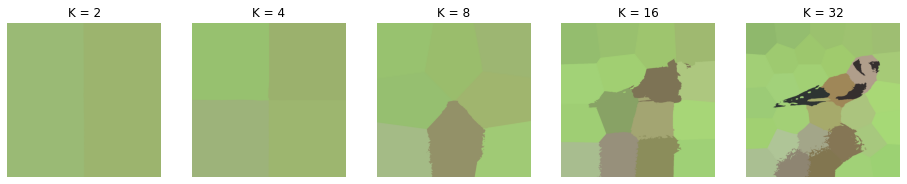

In [28]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

In [29]:
h, w, c = img.shape
print(img.shape)


(1024, 1024, 3)


[[157.92478952 193.11710818 119.9327195  122.20115422  60.97236181]
 [153.23472433 174.74738883 108.1759435  132.94275021 187.63091722]]
[[166.10276572 199.67596206 129.65704453 168.08866969  51.51146661]
 [167.56597161 206.09516163 123.00969923 169.24626544 211.82381008]
 [157.91956496 192.79108574 112.34850949  45.8563058  124.39140507]
 [113.99114494 101.88165109  75.836658   173.13200095 137.94035052]]
[[156.22232503 200.99196561 114.554258    67.6128737   41.80074654]
 [162.73665807 145.20782655 105.93302324 124.23667965 156.59197434]
 [132.13362943 119.81092877  90.20518367 218.42570107 127.93401446]
 [166.63278783 198.48955312 122.22796083  56.571996   220.65871002]
 [167.98476708 200.41565217 133.59673395 188.13440476  53.04446429]
 [158.04486375 199.65859783 110.68314102  45.12127626 125.87796794]
 [164.59966221 211.35855838 120.35197209 194.56637281 212.35703015]
 [ 47.13680105  48.03574636  45.96384305 116.66756268 136.70417511]]
[[162.14741591 209.42885963 120.2285882  102.

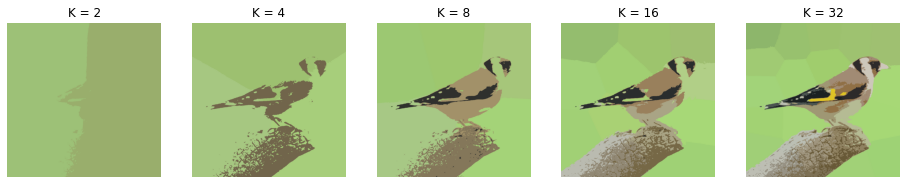

In [30]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()